# Experiment development

Our main question is, under what conditions are covert signalling or churlishness strategies better than overt signaling and generousness?

In our experiments we will vary parameter settings to see, e.g., whether different levels of homophily make covert/churlish strategies more beneficial than the alternative. 

First, I review the results from "The Evolution of Covert Signaling" that answer our question. Then I will explain how to convert that to an agent-based model.

According to Paul's "summary of results" in his slides from CES 2017, covert signaling evolves when

1. Generous receiving is also favored... 
    - When signals are sufficiently noisy
    - Assortment under free choice isn't too efficient 
    - ...how to translate these to our ABM?
1. Forced choice scenarios are common (i.e. $w \approx 0$)
1. Similarity is low (?)
1. Cost of being disliked is high ($d$ and $\delta$ large)

But I'd like to understand a little better how these are implemented in the paper/analytical model, especially

1. How to represent noisy signaling in the ABM model and what is the mechanism for setting assortment "efficiency"? 
1. What does it mean that "similarity is low"?

One first step would be to write out again the differences between "like" and "dislike" and "similar" and "dissimilar".

### Like and dislike (and neutral)

These are "attitudes" in the id-sig model. A focal agent develops an attitude towards another agent when that focal agent receives a signal from that other agent.

The signal an agent sends is the trait vector. In the case of covert signaling, however, only similar agents receive the message that they are, in fact similar. Although they may have never interacted before, somehow an honest signal only goes through to similar agents. Other agents "ignore" the signal.

In the paper it seems the proportion $r < R$ who receive a covert signal are only similar ones. In the model writeup I'm implementing, I believe the idea was $r$ of the whole population would recieve the signal, but only similar agents would update their attitude to Like. 

![](Figure1_IdSigPaper.png)

Is it the case now that dissimilar agents change to "Neutral" on hearing a covert signal? Say, for example, a Churlish agent receives a covert signal from a previously unknown other. Does it change its attitude towards the unknown other from dislike to neutral?

On a practical note, double check the implementation of determining similarity. I had a flash of doubt, maybe it is not correct.


### Similar and dissimilar

When agents assort and interact, the interaction probability and payoff are both only a function of attitude like/dislike/neutral.

In "ECS" there is a parameter $s$ that we do not use here--we do have a parameter $s$, but is the payoff bonus for two interacting agents to be similar. In the paper, $s$ represents the "baseline rate of similarity". Because the population $N \to \infty$ in the evolutionary model of ECS, it is not necessary to explicitly model traits. In this way, one has a more realistic picture of similarity than what is in the ABM currently. Specifically, $s$ can be greater or less than 0.5, which is realistic in that we probably would not say we are similar with half the world, maybe it's a small fraction of people in the world with whom we are similar. On the other hand, in work settings for example, the proportion is much higher, perhaps 0.9+. 

In the ABM, $s \approx 0.5$ since similarity between agents $i$ and $j$ is determined by their trait vectors $\tau_i$ and $\tau_j$, each of which have $K$ components, where each component is written $\tau_{ik}$. Similarity is defined 

$$
\text{sim}_{ij} = \begin{cases}
    1 & \text{if } \sum_{k=1}^K \tau_{ik} \tau_{jk} > 0\\
    -1 & \text{otherwise.}
    \end{cases}
$$

By setting $K$ to be odd, we can guarantee $\sum_{k=1}^K \tau_{ik} \tau_{jk}$ is never zero.

## Notes from "ECS" results

These points are from the first paragraph of the section "Analysis and Results" in ECS.

1. Covert signals require a sufficient proportion of receivers to default to neutral attitudes. Default disliking means covert signals produce no benefit.
1. Covert signals require the cost of being disliked in the forced choice to be sufficiently high. This means the prob of similarity ($s$ in ECS) must be sufficiently low to increase the "risk of being disliked by dissimilar individuals."
1. Overt signalers cannot have too large an advantage in free choice. This means accuracy of assortment not be too accurate. "[A]ccuracy of assortment is influenced by the reception probabilities of both signal types, $R$ and $r$, as well as the proportional odds assortment factors, $w_L$ and $w_D$. 

Some notes on this. First, I think we should have the proportion of initial churlish agents be a parameter and not something that can evolve, for starters, since the results seem to focus on that. But the results also feature the evolution of churlishness (y-axis in Figure 2 of model dynamics). In fact, the first point above casts receiving strategy as a parameter to be set, not to evolve. So I think it should be the case that, for our initial experiments, only signaling strategy evolves.

Second, we could set a similarity threshold that will indirectly/approximately set $s$. That is, instead of having the condition for $\text{sim}_{ij} = 1$ to be greater than zero, set it to be $S$:

$$
\text{sim}_{ij} = \begin{cases}
    1 & \text{if } \sum_{k=1}^K \tau_{ik} \tau_{jk} > S\\
    -1 & \text{otherwise.}
    \end{cases}
$$

Finally, we can change accuracy of assortment by the reception probabilities $R$ and $r$, and the homophily parameter, $w$.

## First experiment: evolution of covert signalling as a function of $r$

Unit testing helped fix a number of bugs, and now there are tests in the `test` directory. Model and experiments are in `id_signaling`. 

I am suppressing receiving strategy evolution to try to get a handle on signaling strategy evolution first, make sure that is working as expected.

In [39]:
from id_signaling.experiment import (
    analyze_covert_receiving_prob, vary_covert_receiving_prob
)

res = vary_covert_receiving_prob(
    covert_rec_probs=[0.1, 0.25, 0.45], 
    similarity_benefit=0.4
)

Covert receiving probability: 0.1
Trial 1 / 10
Covert receiving probability: 0.1
Trial 2 / 10
Covert receiving probability: 0.1
Trial 3 / 10
Covert receiving probability: 0.1
Trial 4 / 10
Covert receiving probability: 0.1
Trial 5 / 10
Covert receiving probability: 0.1
Trial 6 / 10
Covert receiving probability: 0.1
Trial 7 / 10
Covert receiving probability: 0.1
Trial 8 / 10
Covert receiving probability: 0.1
Trial 9 / 10
Covert receiving probability: 0.1
Trial 10 / 10
Covert receiving probability: 0.25
Trial 1 / 10
Covert receiving probability: 0.25
Trial 2 / 10
Covert receiving probability: 0.25
Trial 3 / 10
Covert receiving probability: 0.25
Trial 4 / 10
Covert receiving probability: 0.25
Trial 5 / 10
Covert receiving probability: 0.25
Trial 6 / 10
Covert receiving probability: 0.25
Trial 7 / 10
Covert receiving probability: 0.25
Trial 8 / 10
Covert receiving probability: 0.25
Trial 9 / 10
Covert receiving probability: 0.25
Trial 10 / 10
Covert receiving probability: 0.45
Trial 1 / 10


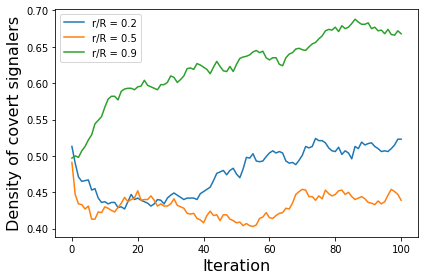

In [41]:
analyze_covert_receiving_prob(res)
plt.xlabel('Iteration', size=16)
plt.ylabel(r'Density of covert signalers', size=16)
plt.legend()

In [42]:
# Time consuming to run, so it's commented out...

# from id_signaling.experiment import (
#     analyze_covert_receiving_prob, vary_covert_receiving_prob
# )

# res = vary_covert_receiving_prob(
#     covert_rec_probs=[0.05, 0.15, 0.25, 0.35, 0.45], 
#     n_trials=100,
#     similarity_benefit=0.4
# )

Covert receiving probability: 0.05
Trial 1 / 10
Covert receiving probability: 0.05
Trial 2 / 10
Covert receiving probability: 0.05
Trial 3 / 10
Covert receiving probability: 0.05
Trial 4 / 10
Covert receiving probability: 0.05
Trial 5 / 10
Covert receiving probability: 0.05
Trial 6 / 10
Covert receiving probability: 0.05
Trial 7 / 10
Covert receiving probability: 0.05
Trial 8 / 10
Covert receiving probability: 0.05
Trial 9 / 10
Covert receiving probability: 0.05
Trial 10 / 10
Covert receiving probability: 0.05
Trial 11 / 10
Covert receiving probability: 0.05
Trial 12 / 10
Covert receiving probability: 0.05
Trial 13 / 10
Covert receiving probability: 0.05
Trial 14 / 10
Covert receiving probability: 0.05
Trial 15 / 10
Covert receiving probability: 0.05
Trial 16 / 10
Covert receiving probability: 0.05
Trial 17 / 10
Covert receiving probability: 0.05
Trial 18 / 10
Covert receiving probability: 0.05
Trial 19 / 10
Covert receiving probability: 0.05
Trial 20 / 10
Covert receiving probability:

Covert receiving probability: 0.15
Trial 69 / 10
Covert receiving probability: 0.15
Trial 70 / 10
Covert receiving probability: 0.15
Trial 71 / 10
Covert receiving probability: 0.15
Trial 72 / 10
Covert receiving probability: 0.15
Trial 73 / 10
Covert receiving probability: 0.15
Trial 74 / 10
Covert receiving probability: 0.15
Trial 75 / 10
Covert receiving probability: 0.15
Trial 76 / 10
Covert receiving probability: 0.15
Trial 77 / 10
Covert receiving probability: 0.15
Trial 78 / 10
Covert receiving probability: 0.15
Trial 79 / 10
Covert receiving probability: 0.15
Trial 80 / 10
Covert receiving probability: 0.15
Trial 81 / 10
Covert receiving probability: 0.15
Trial 82 / 10
Covert receiving probability: 0.15
Trial 83 / 10
Covert receiving probability: 0.15
Trial 84 / 10
Covert receiving probability: 0.15
Trial 85 / 10
Covert receiving probability: 0.15
Trial 86 / 10
Covert receiving probability: 0.15
Trial 87 / 10
Covert receiving probability: 0.15
Trial 88 / 10
Covert receiving pro

Covert receiving probability: 0.35
Trial 37 / 10
Covert receiving probability: 0.35
Trial 38 / 10
Covert receiving probability: 0.35
Trial 39 / 10
Covert receiving probability: 0.35
Trial 40 / 10
Covert receiving probability: 0.35
Trial 41 / 10
Covert receiving probability: 0.35
Trial 42 / 10
Covert receiving probability: 0.35
Trial 43 / 10
Covert receiving probability: 0.35
Trial 44 / 10
Covert receiving probability: 0.35
Trial 45 / 10
Covert receiving probability: 0.35
Trial 46 / 10
Covert receiving probability: 0.35
Trial 47 / 10
Covert receiving probability: 0.35
Trial 48 / 10
Covert receiving probability: 0.35
Trial 49 / 10
Covert receiving probability: 0.35
Trial 50 / 10
Covert receiving probability: 0.35
Trial 51 / 10
Covert receiving probability: 0.35
Trial 52 / 10
Covert receiving probability: 0.35
Trial 53 / 10
Covert receiving probability: 0.35
Trial 54 / 10
Covert receiving probability: 0.35
Trial 55 / 10
Covert receiving probability: 0.35
Trial 56 / 10
Covert receiving pro

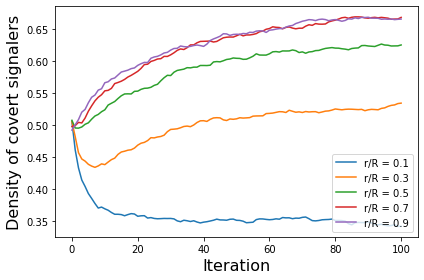

In [44]:
# analyze_covert_receiving_prob(res)
# plt.xlabel('Iteration', size=16)
# plt.ylabel(r'Density of covert signalers', size=16)
# plt.legend()

Now I will create an experiment that varies $r$ and $w$ as independent variables, and measure the density of covert signallers at $t=100$ for an initial experiment. 

Apparently we need to do longer time runs. I'm going to try that here first, then dive in to the homophily-receptivity experiment.

In [1]:
from id_signaling.experiment import (
    analyze_covert_receiving_prob, vary_covert_receiving_prob
)

res = vary_covert_receiving_prob(
    covert_rec_probs=[0.1, 0.25, 0.45], 
    similarity_benefit=0.4,
    n_trials=20,
    n_iter=200
)

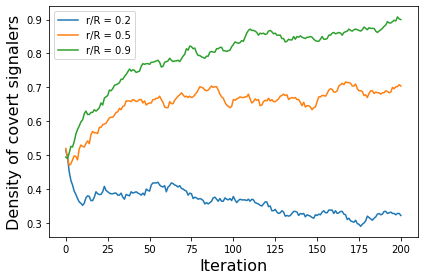

In [3]:
analyze_covert_receiving_prob(res)
plt.xlabel('Iteration', size=16)
plt.ylabel(r'Density of covert signalers', size=16)
plt.legend()

## Homophily-receptivity experiment

Covert signaling strategy is hypothesized to bestow higher payoffs more often when either assortment is not efficient (i.e. homophily is weak and $w \approx 0$) or when a higher fraction of the population is receptive to covert signals (e.g. have a sense of humor). 

Since these are two easily identifiable variations that are highlighted in the original ECS paper, I will begin here for the first prototype results from this model. I believe I can just run the model for 100 iterations as a start, but we'll see.

More importantly to begin on is a slurm job queue harness. I've done this process many times. I can't believe there aren't any tools to do this easier, and I think there's an opportunity for a neat bit of software that makes scaling up easier, from laptop to job scheduler on a shared cluster.

Anyway, I will continue to parallelize to cores by trial. I will be parallelizing to nodes by homophily parameter. I'll be running a number of covert_rec_probs per homophily parameter, though if I see an opportunity to parallelize to nodes by pairs of the two independent variables I will do that.

#### Note on time scales

It appears that the simulations are not stable at t=100, but that differences between timeseries only increase after that, and t=200 is not that much different. Not clear how long it would take to get to equilibrium. So let's do t=100 for a prototype to get some preliminary results.

In [7]:
from id_signaling.experiment import trials_receptivity_homophily

res = trials_receptivity_homophily(0.25, 0.1, n_trials=3)

running trial with random seed 3612728106
running trial with random seed 4260788819
running trial with random seed 547346661


In [8]:
res.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [11]:
list(range(3)) * 3

[0, 1, 2, 0, 1, 2, 0, 1, 2]

In [13]:
a = np.array([[0, 2, 3], [3, 1, 0]])
a.flatten()

array([0, 2, 3, 3, 1, 0])

In [23]:
df = trials_receptivity_homophily(0.25, 0.1, n_trials=3, n_iter=10)

running trial with random seed 3037017936
running trial with random seed 1286814267
running trial with random seed 468332546


    timestep  prop_covert
0          0         0.53
12         1         0.51
24         2         0.41
3          3         0.59
15         4         0.50
27         5         0.42
6          6         0.59
18         7         0.49
30         8         0.37
9          9         0.61
21        10         0.55


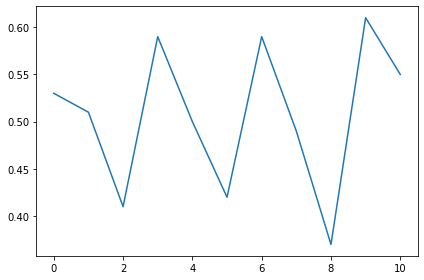

In [24]:
df.head()

t0 = df.loc[df.trial_idx == 0][['timestep', 'prop_covert']].sort_values(by=['timestep'])
print(t0)
plt.plot(t0.prop_covert.values)
# plt.plot(t0.prop_covert)

homophily  receptivity  timestep
0.1        0.25         0           0.510000
                        1           0.470000
                        2           0.503333
                        3           0.516667
                        4           0.496667
                        5           0.530000
                        6           0.496667
                        7           0.490000
                        8           0.493333
                        9           0.506667
                        10          0.523333
Name: prop_covert, dtype: float64


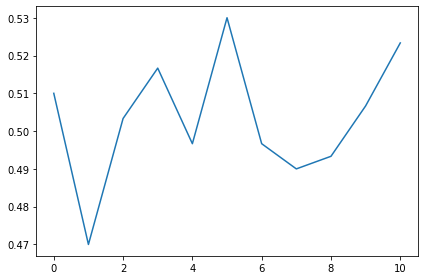

In [25]:
gb_mean = df.groupby(['homophily', 'receptivity', 'timestep']
                     )['prop_covert'].mean()
print(gb_mean)
plt.plot(gb_mean.values)

In [ ]:
# Now demonstrate how we would add another parameter
# setting.
import pandas as pd
df2 = trials_receptivity_homophily(0.15, 0.1, n_trials=3, n_iter=10)

   timestep  trial_idx  homophily  receptivity  prop_covert
0         0          0        0.0          0.2         0.53
1         1          1        0.0          0.2         0.54
2         2          2        0.0          0.2         0.53
3         3          3        0.0          0.2         0.50
4         4          4        0.0          0.2         0.51


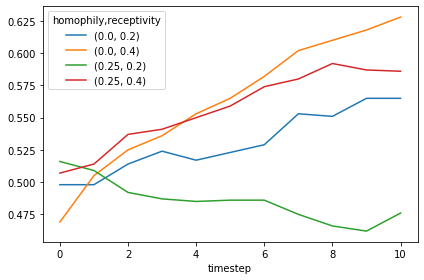

In [47]:
df_disk = pd.read_csv('output_data/test.csv')

print(df_disk.head())

gb_mean = df_disk.groupby(['homophily', 'receptivity', 'timestep']
                     )['prop_covert'].mean()

gb_mean.unstack(level=(0,1)).plot()

homophily  receptivity  timestep
0.1        0.15         0           0.476667
                        1           0.453333
                        2           0.460000
                        3           0.433333
                        4           0.453333
                        5           0.420000
                        6           0.413333
                        7           0.413333
                        8           0.423333
                        9           0.436667
                        10          0.423333
           0.25         0           0.510000
                        1           0.470000
                        2           0.503333
                        3           0.516667
                        4           0.496667
                        5           0.530000
                        6           0.496667
                        7           0.490000
                        8           0.493333
                        9           0.506667
                      

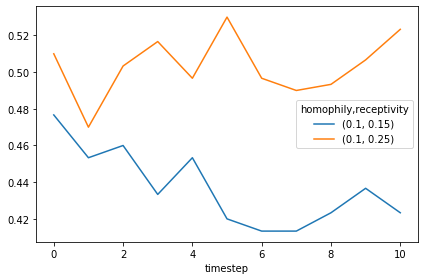

In [45]:
df_full = df.append(df2)

gb_mean = df_full.groupby(['homophily', 'receptivity', 'timestep']
                     )['prop_covert'].mean()

print(gb_mean)
# gb_mean.plot(x='timestep')
# plt.figure()

import seaborn as sns

# sns.lineplot(x="timestep", y="prop_covert", 
#              style=["homophily", "receptivity"],
#              data=df_full)

gb_mean.unstack(level=(0,1)).plot()


In [42]:
series = res.groupby(
    ['homophily', 'receptivity', 'timestep']
)['prop_covert']
mean = series.mean()
print(mean)
# plt.plot(vals)

homophily  receptivity  timestep
0.1        0.25         0           0.49
                        1           0.54
                        2           0.57
                        3           0.52
                        4           0.59
                        5           0.63
                        6           0.60
                        7           0.61
                        8           0.61
                        9           0.58
                        10          0.64
Name: prop_covert, dtype: float64


In [1]:
from id_signaling.experiment import (
    analyze_covert_receiving_prob, vary_covert_receiving_prob
)

res = vary_covert_receiving_prob(
    covert_rec_probs=[0.1, 0.25, 0.45], 
    similarity_benefit=0.4,
    n_trials=3,
    n_iter=10
)

running trial
running trial
running trial
running trial
running trial
running trial
running trial
running trial
running trial


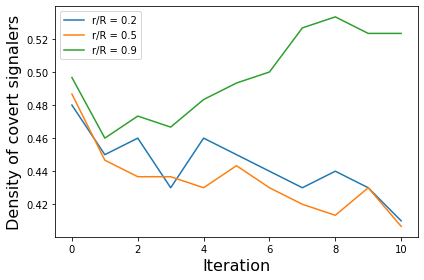

In [2]:
analyze_covert_receiving_prob(res)
plt.xlabel('Iteration', size=16)
plt.ylabel(r'Density of covert signalers', size=16)
plt.legend()

In [3]:
from id_signaling.experiment import (
    analyze_covert_receiving_prob, vary_covert_receiving_prob
)

res = vary_covert_receiving_prob(
    covert_rec_probs=[0.1, 0.25, 0.45], 
    similarity_benefit=0.4,
    n_trials=3,
    n_iter=10
)

running trial
running trial
running trial
running trial
running trial
running trial
running trial
running trial
running trial


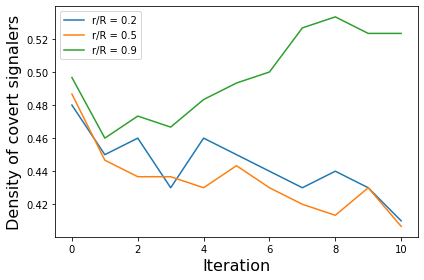

In [4]:
analyze_covert_receiving_prob(res)
plt.xlabel('Iteration', size=16)
plt.ylabel(r'Density of covert signalers', size=16)
plt.legend()

In [5]:
res[0.1]

array([[0.48, 0.45, 0.46, 0.43, 0.46, 0.45, 0.44, 0.43, 0.44, 0.43, 0.41],
       [0.48, 0.45, 0.46, 0.43, 0.46, 0.45, 0.44, 0.43, 0.44, 0.43, 0.41],
       [0.48, 0.45, 0.46, 0.43, 0.46, 0.45, 0.44, 0.43, 0.44, 0.43, 0.41]])